## Filtros

In [4]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
# %matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
#Usamos también las poderosas herramientas de procesamiento de imágenes en python de Scikit
from skimage.util import random_noise

#### Filtro Gaussiano

In [5]:
# Para crear un kernel Gaussiano (unidimensional)
nucleo_g = cv.getGaussianKernel(ksize=5, sigma=1.5) 
# Parámetros:
# ksize - Tamaño del núcleo, positivo impar (3,5,...)
# sigma - Desvío estándar de la Gaussiana. Si no es positivo, se calcula como sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8 
# ktype - Tipo de coeficientes del filtro (Optional). Puede ser CV_32F o CV_64F

print(nucleo_g)

[[0.12007838]
 [0.23388076]
 [0.29208172]
 [0.23388076]
 [0.12007838]]


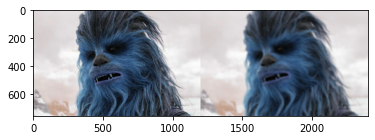

In [7]:
# Suavizado Gaussiano usando el Kernel
#=====================================
img_orig = cv.imread('chewbacca.jpg')
 
## como es separable puedo crear que tenga un sigma en X y otro en Y
# Creamos un núcleo Gaussiano unidimensional
kX = cv.getGaussianKernel(17,5)
kY = cv.getGaussianKernel(5,2)
 
# Aplicamos el filtro Gaussiano. Con distinto núcleo para X e Y!
b = cv.sepFilter2D(img_orig, -1, kX, kY)

# Más fácil utilizando una única línea
# (cuando el kernel es cuadrado)
#=====================================
c = cv.GaussianBlur(img_orig, (17,17), 5)

# Mostramos la imagen
out1 = cv.hconcat([img_orig,b])
out2 = cv.hconcat([img_orig,c])

plt.imshow(out1)

plt.imshow(out2)

plt.show()

#### Filtro de mediana

¿Por qué está esto acá?. Porque muchas veces es necesario antes de correr un filtro de búsqueda de bordes eliminar todo posible ruido que pueda generar falsas detecciones

In [5]:
img2 = cv.imread('tapitas.jpg',0)

# Agregar ruido salt&pepper a la imagen
noise_img = random_noise(img2, mode="s&p",amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Otra manera de agregar ruido (no es salt&pepper) con numpy
#gauss = np.random.normal(0,1,img2.size)
#gauss = gauss.reshape(img2.shape[0],img2.shape[1]).astype('uint8')
#noise_img = img2 + img2 * gauss

# Aplicar el filtro de media
mean = cv.blur(noise_img,(5,5))

# Aplicar el filtro de mediana
median = cv.medianBlur(noise_img,5)
 
# Mostrar la imagen
cv.imshow('Original',noise_img)
cv.imshow('Media',mean)
cv.imshow('Mediana',median)

#### DoG

In [9]:
# Cargamos la imagen
img_orig = cv.imread('tapitas.jpg',0)
#img_orig = cv.imread('chewbacca.jpg',0)

# Aplicamos un suavizado Gaussiano de 3x3 y de 5x5
low_sigma = cv.GaussianBlur(img_orig, (3,3), 0, 0)
high_sigma = cv.GaussianBlur(img_orig, (5,5), 0, 0)

# Calculamos el DoG por sustracción
dog = low_sigma - high_sigma

# Aplico filtro de mediana
median = cv.medianBlur(dog,5)

# Mostramos la imagen
out1 = cv.hconcat([img_orig, dog, median])
cv.namedWindow("DoG", 2)
cv.imshow("DoG",out1)

#### Filtro bilateral

In [11]:
# Aplicamos el filtro bilateral
#==============================
d=9
img_blt = cv.bilateralFilter(img_orig, d, 2*d, d/2)
# Parámetros:
# src - imagen de entrada
# d - Tamaño de filtro. Si no es positivo se calcula desde sigmaSpace
# sigmaColor - Filtro sigma en el espacio de color (Filtro de Rango)
# sigmaSpace - Filtro sigma en el espacio de coordenadas (Filtro de Dominio)
# borderType - Tipos de borde (opcional)

# Mostramos la imagen
out1 = cv.hconcat([img_orig,img_blt])
cv.namedWindow("Chewbacca Bilateral",2)
cv.imshow("Chewbacca Bilateral",out1)

#### Unsharp masking

In [12]:
# Cargar la imagen (la carga como BGR)
img_orig = cv.imread("chewbacca.jpg")
# La convertimos a RGB
img_orig = cv.cvtColor(img_orig,cv.COLOR_BGR2RGB)
# Suavizar la imagen
gauss = cv.GaussianBlur(img_orig, (7,7), 0)
# Aplicar la máscara de enfoque: 
# addWeighted calcula la suma pesada de dos arreglos según: dst(I)=saturate(src1(I)∗alpha+src2(I)∗beta+gamma)
# parámetros: (src1(I),alpha,src2(I),beta,gamma)
img_sharp = cv.addWeighted(img_orig, 2, gauss, -1, 0)

# Más enfocada
k=1.5
img_sharp2 = cv.addWeighted(img_orig, k+1, gauss, -k, 0)

# Re enfocada
k=20
img_sharp3 = cv.addWeighted(img_orig, k+1, gauss, -k, 0)


# Nueva figura
fig = plt.figure()

ax1=plt.subplot(221)
ax1.set_title('Original')
ax1.imshow(img_orig)
ax2=plt.subplot(222)
ax2.set_title('Enfocada (k=1)')
ax2.imshow(img_sharp)
ax3=plt.subplot(223)
ax3.set_title('Más enfocada (k=1.5)')
ax3.imshow(img_sharp2)
ax4=plt.subplot(224)
ax4.set_title('Re enfocada (k=2)')
ax4.imshow(img_sharp3)

fig.show()

# Mostrar las imagenes lado a lado usando cv2.hconcat
#out1 = cv.hconcat([img_orig,img_sharp])
#cv.namedWindow("Chewbacca",2)
#cv.imshow("Chewbacca",out1)